In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Word Embeddings

* Define the semantics of words by the context in which they are used.
* **word embeddings** are low-dimensional floating point vectors that are learned from data. 
* They are typically 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 

#### Two types of word embeddings:

* **pre-trained word embeddings** are pre-computed embeddings that are learned from a large corpus.
    - You can load these into your model and then fine-tune for your domain.
    - The two most used are Word2Vec and GloVe
* **Learned word embeddings** are vectors that are learned jointly with the other model parameters


## Pre-trained word embeddings

* Sometimes you have so little training data available that could never use your data alone to learn an appropriate task-specific embedding of your vocabulary. 

* In this case, instead of learning word embeddings you use embedding vectors from a pre-computed 
embedding space that captures generic aspects of language structure. 

* These pre-computed embeddings are generally computed using word occurrence statistics.
* Word2Vec and GloVe are the two most common pre-trained word embeddings

## Word2Vec

* First pre-trained word embedding system

* Developed by a team led Thomas Mikolov at Google in 2013

https://papers.nips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf

* Two types of models to learn the embeddings
    - Continuous Bag of Words (CBOW)
    - Skip-Gram

#### Continuous Bag of Words (CBOW)

* Maps Context to Target Word
    - I went to the bank on Tuesday. Predict 'bank' from {I,went,to,the,on,Tuesday}

![](CBOW.png)
$$\text{Figure 1. Word2Vec CBOW}$$

* $x_{ik} i=1,2,....C$ where C = number of words in context, k = Number of words in vocabulary.
    - Each $x_{ik}$ is a one-hot encoded vector of the context word
* $W_{VxN}$ is the weight matrix mapping the word to the hidden layer
* $h_i$ is hidden layer output. $h_i = \frac{1}{C}W^T(x_1,...,x_C)$
* $W^{'}_{NxV}$ is the weight matrix mapping the hidden layer to the Output layer
    - The hidden layer has no non-linear activation
* $y_j$ is the  V_dimension output distribution (i.e. the output activation is the softmax function)  for the target word.


#### Skip-Gram Model

* Maps Word to Context
    - I went to the bank on Tuesday. Predict {I,went,to,the,on,Tuesday} from 'bank'

![](Skip-Gram.png)
$$\text{Figure 2. Skip-Gram Model}$$

* $x_k$ is the one-hot encoded word used to predict the context
* $W_{VxN}$ is the weight matrix mapping the word to the hidden layer
$h_i$ is hidden layer input.
* $W^{'}_{NxV}$ is the weight matrix mapping the hidden layer to the Output layer
* $y_{ij} i=1,2,....C$ is the V_dimension output distribution (i.e. the output activation is the softmax function)  for the i context word.

### Download the word vectors

In [2]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

[=================================================-] 100.0% 1662.0/1662.8MB downloaded


### Vector representation of a word

In [27]:
word2vec_model["beautiful"]

array([-0.01831055,  0.05566406, -0.01153564,  0.07275391,  0.15136719,
       -0.06176758,  0.20605469, -0.15332031, -0.05908203,  0.22851562,
       -0.06445312, -0.22851562, -0.09472656, -0.03344727,  0.24707031,
        0.05541992, -0.00921631,  0.1328125 , -0.15429688,  0.08105469,
       -0.07373047,  0.24316406,  0.12353516, -0.09277344,  0.08203125,
        0.06494141,  0.15722656,  0.11279297, -0.0612793 , -0.296875  ,
       -0.13378906,  0.234375  ,  0.09765625,  0.17773438,  0.06689453,
       -0.27539062,  0.06445312, -0.13867188, -0.08886719,  0.171875  ,
        0.07861328, -0.10058594,  0.23925781,  0.03808594,  0.18652344,
       -0.11279297,  0.22558594,  0.10986328, -0.11865234,  0.02026367,
        0.11376953,  0.09570312,  0.29492188,  0.08251953, -0.05444336,
       -0.0090332 , -0.0625    , -0.17578125, -0.08154297,  0.01062012,
       -0.04736328, -0.08544922, -0.19042969, -0.30273438,  0.07617188,
        0.125     , -0.05932617,  0.03833008, -0.03564453,  0.24

In [28]:
word2vec_model["beautiful"].shape

(300,)

### Word vectors and the meanings of words


In [29]:
word2vec_model.most_similar("girl")

[('boy', 0.8543272018432617),
 ('teenage_girl', 0.7927976250648499),
 ('woman', 0.7494640946388245),
 ('teenager', 0.717249870300293),
 ('schoolgirl', 0.7075953483581543),
 ('teenaged_girl', 0.6650916337966919),
 ('daughter', 0.6489864587783813),
 ('mother', 0.6478164196014404),
 ('toddler', 0.6473966836929321),
 ('girls', 0.6154742240905762)]

#### queen - girl + boy = king

In [30]:
word2vec_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.7298422455787659)]

In [31]:
word2vec_model.most_similar(positive=['man', 'queen'], negative=['woman'], topn=1)

[('king', 0.6958590149879456)]

In [32]:
word2vec_model.most_similar(positive=['boy', 'princess'], negative=['girl'], topn=1)

[('prince', 0.7020792961120605)]

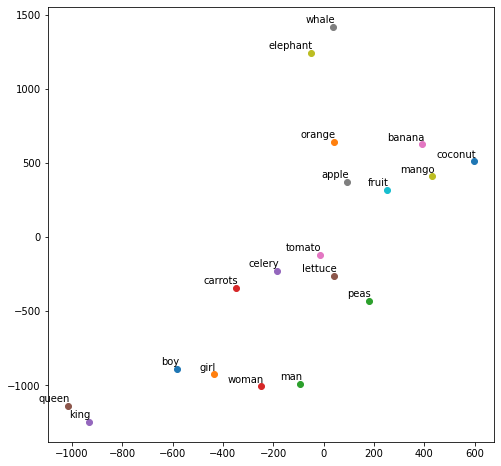

In [33]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange",
         "peas","carrots","celery","lettuce","tomato","whale","elephant"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42) # projects to lower dimension
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)

### Learned Word Embeddings: The Embedding layer

* Learn the the geometric relationships between word vectors should reflect the semantic relationships between these words. 
* Word embeddings map language into a geometric space with a similarity metric.
    - Words similar in meaning (e.g. cat and dog) should be close in the geometric space. 
    - The geometric distance (e.g. Euclidean distance) between any two word vectors should reflect the semantic distance of the associated words 
* The **embedding layer** represents a word as a vector in this geometric space learned through backpropagation.

* The Embedding layer is like a dictionary mapping integer indices which represent specific words to real-valued  vectors. 

### Embedding layer in Tensorflow

* The Embedding layer takes at least two arguments:
    - The number of samples (i.e. words, tokens)
    - The dimensionality (length) of the embedding vector

* This layer returns a 3D floating point tensor, of shape (num_samples, sequence_length, embedding_dimensionality). 

* When this layer is instantiated, its weights are initially random. During training, these word vectors will be gradually adjusted via backpropagation, structuring the space into a representation that can be used in other layers.



In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

tf.__version__

'2.3.0'

### Sentiment prediction using IMDB Movie Reviews

* The number of words is restricted to the top 10,000 most common words in the reviews 
* The reviews are trucated to only 20 words. 
* The model will consist of:
    - An 8-dimensional embedding for each of the 10,000 words
    - Flatten layer the tensor to 2D, and 
    - A single Dense layer to classify a review as favorable or not.

In [11]:
max_features = 10000 # Number of words to consider as features

maxlen = 20 # Cut text after maxlen (among top max_features most common words)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
type(X_train[0]),len(X_train[0]),max(X_train[0])

X_train[0][0:10]

17465344/17464789 [==============================] - 0s 0us/step
(25000,) (25000,) (25000,) (25000,)


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [12]:
len(X_train[1])

189

#### Create 2D integer tensor of shape (samples, maxlen)

In [13]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print(X_train.shape,X_test.shape)
X_train[0,:]

(25000, 20) (25000, 20)


array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32], dtype=int32)

#### Create Model


In [14]:
model = Sequential()

model.add(Embedding(10000, 8, input_length=maxlen))
# Output shape (samples, maxlen, 8)
model.add(Flatten()) # Flatten into a 2D tensor of shape (samples, maxlen * 8)
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


#### Compile and fit

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6762 - acc: 0.6004 - val_loss: 0.6314 - val_acc: 0.6892
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5505 - acc: 0.7459 - val_loss: 0.5306 - val_acc: 0.7276
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4657 - acc: 0.7850 - val_loss: 0.4999 - val_acc: 0.7464
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4272 - acc: 0.8043 - val_loss: 0.4933 - val_acc: 0.7504
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4029 - acc: 0.8184 - val_loss: 0.4948 - val_acc: 0.7528
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3838 - acc: 0.8288 - val_loss: 0.4980 - val_acc: 0.7554
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3667 - acc: 0.8382 - val_loss: 0.4996 - val_acc: 0.7590
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

#### Compute classification accuracy

In [16]:
def accuracy(x,y):
    y_hat = model.predict(x)
    foo = np.array([1 if i > .5 else 0 for i in y_hat[:,0] ])
    return np.sum(foo == y)/len(y)


In [17]:
accuracy(X_train,y_train),accuracy(X_test,y_test)

(0.85516, 0.76136)

* This model with a single Dense layer treats each word in the input sequence separately
    - Inter-word relationships and structure sentence are not taken into account
* We could add recurrent layers or 1D convolutional layers after the embedded sequences to learn features that take into account each sequence as a whole.

### Embedding layer Pytorch

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)
torch.__version__

'1.7.0+cu101'

In [19]:
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)

tensor([[ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519]],
       grad_fn=<EmbeddingBackward>)


In [20]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()

# Build a list of trigrams.  Each trigram is ([ word_i-2, word_i-1 ], target word)
# Note: we should tokenize the input

trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]

print(trigrams[:3])

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


In [21]:
vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}
len(vocab)

97

In [22]:
word_to_ix["winters"]

26

In [23]:
class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1)) # Reshape
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
model

NGramLanguageModeler(
  (embeddings): Embedding(97, 10)
  (linear1): Linear(in_features=20, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=97, bias=True)
)

#### Negative Log-Likelihood Loss

* Similar to cross-entropy loss.
* In cross entropy loss (nn.CrossEntropyLoss) the forward function outputs logits which will be input to a softmax in the optimizer. 
* In negative log-likelihood loss (tensor.nn.NLLLoss) the log-softmax (tensor.LogSoftmax()) is called in the forward() method.

In [24]:
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [25]:
epochs =10
losses = np.zeros(epochs)
for epoch in range(epochs):
    total_loss = 0
    for context, target in trigrams:
        
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

        model.zero_grad()
        log_probs = model(context_idxs) # forward pass

        # Compute loss function with model output and target.
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
        loss.backward() # compute gradients
        optimizer.step() # update
        
        total_loss += loss.item() # accumulate loss
    losses[epoch] = total_loss
print(losses)  # The loss decreased every iteration over the training data!

[521.18049717 518.48077965 515.80033612 513.13620043 510.48763585
 507.85377598 505.23100877 502.62168455 500.02433562 497.43707323]


In [26]:
model.embeddings(torch.tensor([word_to_ix["winters"]], dtype=torch.long))

tensor([[-0.8336, -1.1937, -2.3073,  0.6030,  0.3151,  1.1425,  0.3057, -0.5796,
          0.5641, -0.8775]], grad_fn=<EmbeddingBackward>)

### References

Chollet, Francois (2018) Deep Learning with Python

https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html

https://arxiv.org/pdf/1411.2738.pdf